In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import glob 
import os

In [1]:
print(1)

1


In [12]:
# Folder containing the CSVs
data_dir = "data/CAISO_LMP_Forecasts"

# Load all monthly files
f = r"C:\VScode\Projet Stanford CS230\CS-230-Deep-Learning-Project\data\CAISO_LMP_Forecasts\CAISO_LMP_Forecast_2022_07\CAISO_LMP_Forecast_2022_07_processed.csv"
data = pd.read_csv(f)

# Create datetime column
data['timestamp'] = pd.to_datetime(dict(year=data.Year, month=data.Month, day=data.Day, hour=data.Hour))
data['hour'] = data['timestamp'].dt.hour
data['day']= data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['day_of_week'] = data['timestamp'].dt.dayofweek
data = data.sort_values('timestamp').reset_index(drop=True)


# Keep only timestamp and LMP
data = data[['timestamp', 'LMP', 'hour', 'day', 'month', 'day_of_week']]
print(data.head())


            timestamp        LMP  hour  day  month  day_of_week
0 2022-07-01 01:00:00  66.762893     1    1      7            4
1 2022-07-01 02:00:00  62.648637     2    1      7            4
2 2022-07-01 03:00:00  61.347333     3    1      7            4
3 2022-07-01 04:00:00  59.363743     4    1      7            4
4 2022-07-01 05:00:00  59.856077     5    1      7            4


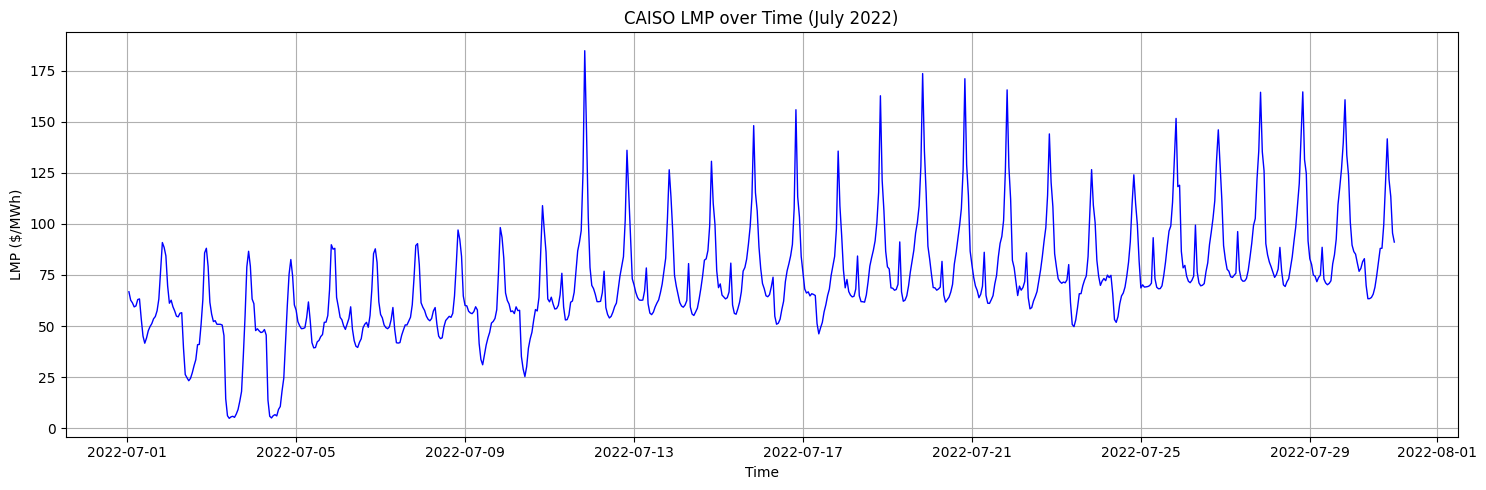

In [13]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamp'], data['LMP'], color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('LMP ($/MWh)')
plt.title('CAISO LMP over Time (July 2022)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
taille_train = 10  # nombre de points utilisés pour prédire le suivant
LMP_series = data['LMP'].values  # numpy array des prix

X = []
y = []

for i in range(len(LMP_series) - taille_train):
    X.append(LMP_series[i:i+taille_train])
    y.append(LMP_series[i+taille_train])

X = np.array(X)
y = np.array(y)

# Ajouter une dimension pour LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model_naive = Sequential([
    Dense(32, activation='relu', input_shape=(taille_train,)),
    Dense(1)  # sortie : prédiction du prochain LMP
])

model_naive.compile(optimizer='adam', loss='mse')
model_naive.summary()

c:\Users\pierr\anaconda3\envs\CS230\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history_niave = model_naive.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 6619.9424 - val_loss: 5900.2217
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 2078.8335 - val_loss: 1416.1799
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 870.7773 - val_loss: 1064.7103
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 773.7972 - val_loss: 934.4877
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 684.1589 - val_loss: 830.3322
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 617.5413 - val_loss: 735.9641
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 560.9722 - val_loss: 658.1688
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 509.2410 - val_loss: 588.5463
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 463.8779 - val_loss: 527.8788
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 420.1151 - val_loss: 473.2426
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 383.9759 - val_loss: 426.2253
Epoch 12/50
18

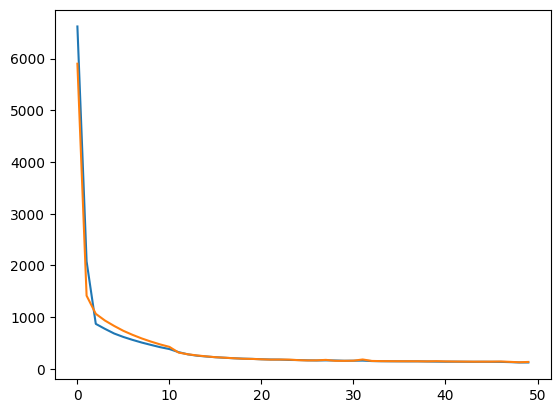

In [51]:
plt.plot(history_niave.history['loss'], label='Train Loss')
plt.plot(history_niave.history['val_loss'], label='Validation Loss')

In [39]:
y_pred_naive = model_naive.predict(X)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


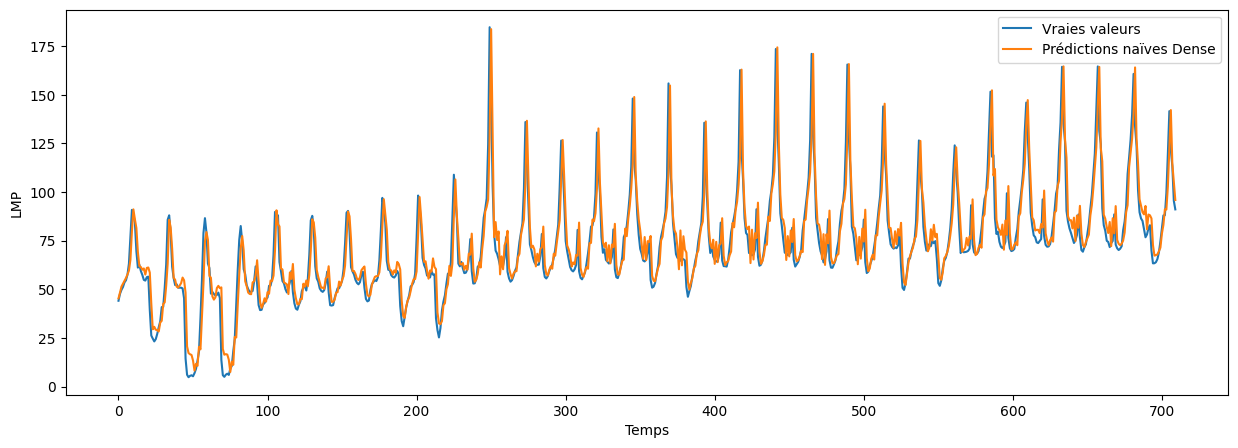

In [40]:
plt.figure(figsize=(15,5))
plt.plot(y, label='Vraies valeurs')
plt.plot(y_pred_naive, label='Prédictions naïves Dense')
plt.xlabel('Temps')
plt.ylabel('LMP')
plt.legend()
plt.show()

In [44]:
model_naive_4layers = Sequential([
    Dense(32, activation='relu', input_shape=(taille_train,)),
    Dense(32, activation='relu', input_shape=(taille_train,)),
    Dense(32, activation='relu', input_shape=(taille_train,)),
    Dense(32, activation='relu', input_shape=(taille_train,)),
    Dense(1)  # sortie : prédiction du prochain LMP
])

model_naive_4layers.compile(optimizer='adam', loss='mse')
model_naive_4layers.summary()

c:\Users\pierr\anaconda3\envs\CS230\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,553 (13.88 KB)

 Trainable params: 3,553 (13.88 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history_naive_4layers = model_naive_4layers.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 1733.3386 - val_loss: 663.1525
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 535.4897 - val_loss: 478.6886
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 351.5716 - val_loss: 292.9834
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 251.9278 - val_loss: 224.3496
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 218.7643 - val_loss: 212.1840
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 202.1980 - val_loss: 193.2393
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 189.0279 - val_loss: 176.7473
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 168.9178 - val_loss: 156.7850
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 162.5761 - val_loss: 156.2323
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 157.8327 - val_loss: 168.3376
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 167.6692 - val_loss: 232.6814
Epoch 12/50
18/18 ━━━━━━━━━━

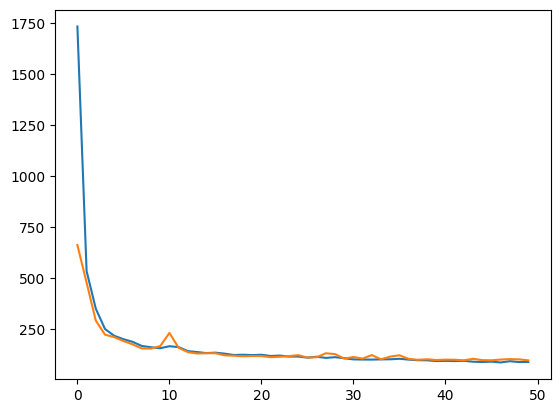

In [49]:
plt.plot(history_naive_4layers.history['loss'], label='Train Loss')
plt.plot(history_naive_4layers.history['val_loss'], label='Validation Loss')

In [46]:
y_pred_naive_4layers = model_naive.predict(X)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


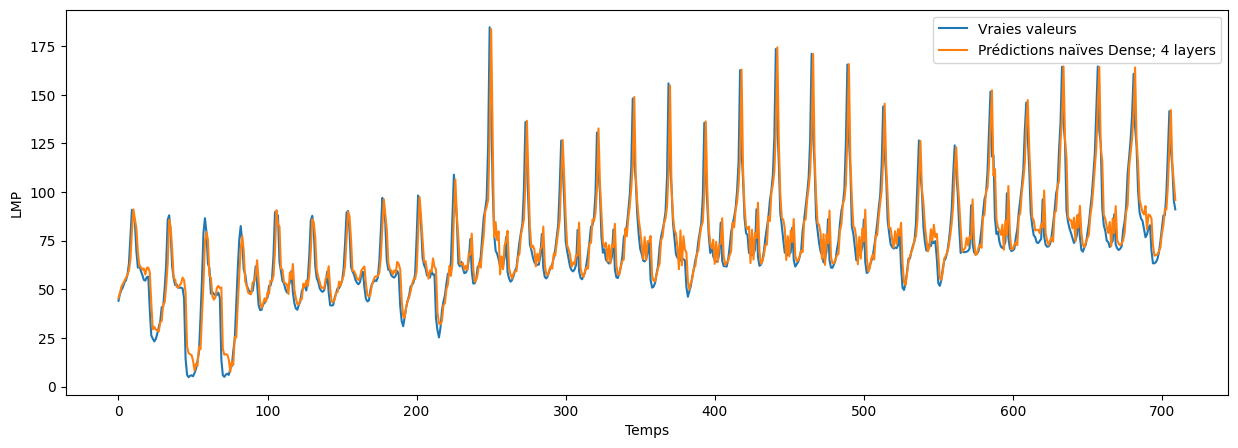

In [48]:
plt.figure(figsize=(15,5))
plt.plot(y, label='Vraies valeurs')
plt.plot(y_pred_naive_4layers, label='Prédictions naïves Dense; 4 layers')
plt.xlabel('Temps')
plt.ylabel('LMP')
plt.legend()
plt.show()

In [16]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(taille_train, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\pierr\anaconda3\envs\CS230\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - loss: 1645.1541 - val_loss: 353.0621
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 261.2108 - val_loss: 157.9069
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 186.8970 - val_loss: 153.8780
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 153.2675 - val_loss: 152.1908
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 123.0845 - val_loss: 177.3166
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 103.7119 - val_loss: 129.6996
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 82.8272 - val_loss: 86.9834
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 76.1509 - val_loss: 109.9438
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 70.4703 - val_loss: 103.2599
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 66.9110 - val_loss: 146.2562
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 67.6709 - val_loss: 90.8540
Epoch 12/50
18/18 ━━━━

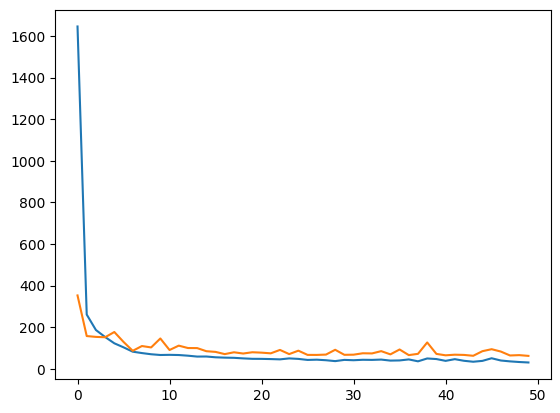

In [17]:
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

Here, there is a slight over fitting that will be tackle by getting a bigger train size and more data. (here, 10 last LMP and over a month)

In [19]:
y_pred = model.predict(X)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step


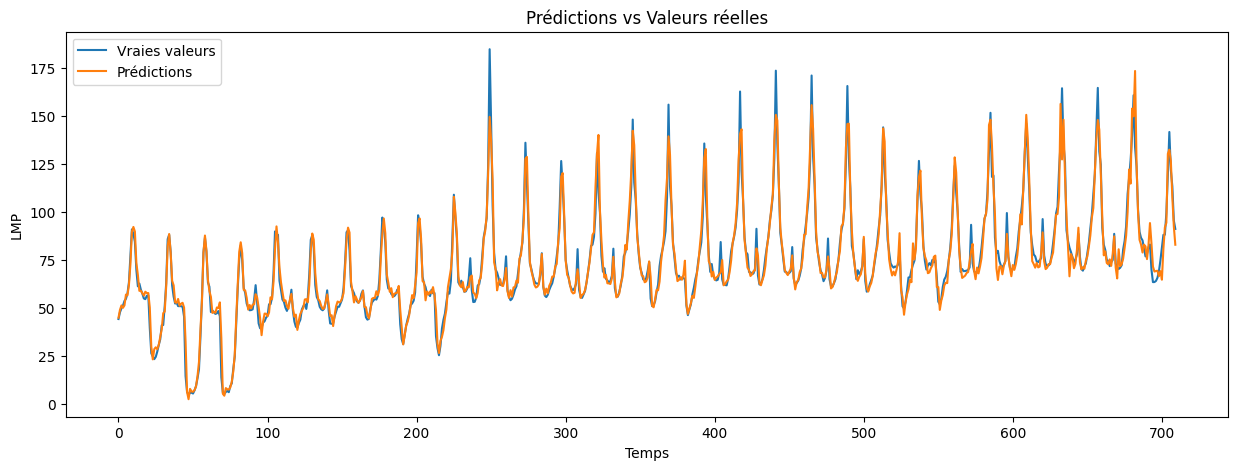

In [20]:
plt.figure(figsize=(15,5))
plt.plot(y, label='Vraies valeurs')
plt.plot(y_pred, label='Prédictions')
plt.xlabel('Temps')
plt.ylabel('LMP')
plt.title('Prédictions vs Valeurs réelles')
plt.legend()
plt.show()

In [25]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/8.9 MB 3.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.9 MB 3.4 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.9 MB 3.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/8.9 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.9 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.8/8.9 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 8.7/8.9 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 3.9 MB/s  0:00:02
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
    ------------------------

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")


MSE: 35.05, MAE: 3.75


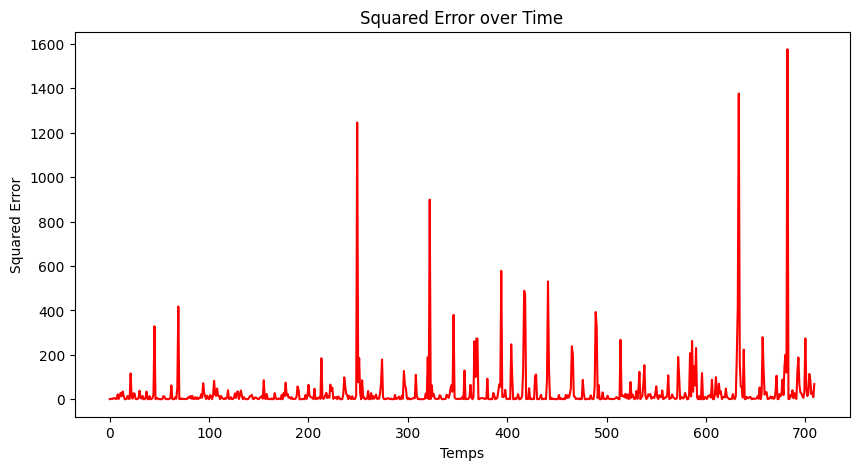

In [31]:
#plot the sqared error over time
plt.figure(figsize=(10,5))
squared_errors = (y - y_pred.flatten())**2
plt.plot(squared_errors, label='Squared Error', color='red')
plt.xlabel('Temps')
plt.ylabel('Squared Error')
plt.title('Squared Error over Time')
plt.show()